# Pair Programming Test Estadísticos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

Happy coding💪🏽

In [2]:
sales = pd.read_csv("../DA-PromoC-Modulo3-Sprint1-Lola-Noemi/ficheros/sales2.csv", index_col=0)
sales.sample(7)

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
3480,801,Utah,West,Small Market,14.0,47.0,92.0,35.0,40.0,11.0,196.0,10.0,20.0,30.0,50.0,12,01/01/11 00:00:00,Tea,Earl Grey,Regular
2103,573,Missouri,Central,Small Market,62.0,107.0,206.0,86.0,65.0,32.0,484.0,50.0,90.0,110.0,200.0,2,02/01/11 00:00:00,Coffee,Columbian,Regular
2040,563,Iowa,Central,Small Market,17.0,27.0,50.0,18.0,17.0,5.0,821.0,20.0,10.0,30.0,40.0,1,01/01/11 00:00:00,Coffee,Amaretto,Regular
1533,504,Louisiana,South,Small Market,46.0,68.0,121.0,46.0,37.0,14.0,388.0,40.0,30.0,60.0,90.0,6,04/01/11 00:00:00,Espresso,Decaf Espresso,Decaf
1052,417,Missouri,Central,Small Market,-9.0,63.0,114.0,44.0,69.0,40.0,261.0,10.0,30.0,60.0,90.0,8,04/01/11 00:00:00,Herbal Tea,Chamomile,Decaf
2979,716,New York,East,Major Market,146.0,130.0,245.0,89.0,38.0,24.0,777.0,110.0,90.0,140.0,230.0,12,01/01/11 00:00:00,Tea,Earl Grey,Regular
1787,513,Ohio,Central,Major Market,24.0,61.0,103.0,42.0,37.0,13.0,384.0,30.0,40.0,60.0,100.0,2,05/01/10 00:00:00,Coffee,Columbian,Regular



### ¿Qué diferencia existe el error de tipo I y el error de tipo II?

- H0: No aumenta el beneficio con el marketing ni las ventas.
- H1: El beneficio aumenta con el marketing y las ventas.


Error de Tipo I: Decimos que no aumenta, cuando sí aumenta.

Error de Tipo II: Decimos que aumenta, cuando realmente no aumenta.

El error de Tipo II es el que no nos interesa cometer, dado que nuestra empresa sufriría pérdidas.

### ¿Qué es la asimetría?

- La asimetría se produce cuando la distribución de los datos se aleja de la media. Puede ser positiva o negativa. 

### ¿Es vuestra variable respuesta asimétrica?

In [7]:
sales["Profit"].skew()

1.055870460824596

- En este caso, vemos que nuestra variable respuesta tiene una distribución asimétrica positiva, es decir, mayor que 0 y, por lo tanto, los datos no son normales. Su media es mayor que la mediana y la moda.

In [4]:
sales["Marketing"].skew()

1.2847684509485233

In [8]:
sales["Sales"].skew()

0.9789707228614547

- En este caso, vemos que nuestras variables predictoras tienen una distribución asimétrica positiva y, por lo tanto, los datos no son normales. 

### ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [9]:
kurtosistest(sales["Profit"])

KurtosistestResult(statistic=8.589216828780973, pvalue=8.756413236225312e-18)

- Vemos que nuestro p-valor es menor que 0.05, lo que nos indica este test es que los datos no son normales y podemos rechazar la H0.

### ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

In [10]:
# probamos el test Shapiro para ver si nuestra variable respuesta es normal

stats.shapiro(sales["Profit"])

ShapiroResult(statistic=0.9109621644020081, pvalue=1.8216880036222622e-44)

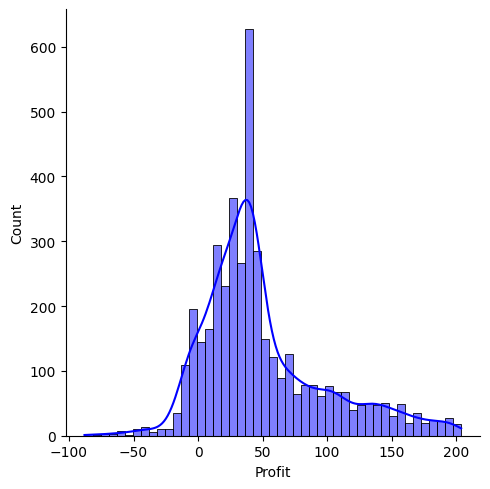

In [11]:
sns.displot(sales["Profit"], kde = True, color = "blue");

- Como observamos con el test Shapiro y el displot, nuestra variable respuesta no tiene una distribución normal y es asimétrica, ya que su forma se aleja a la forma de una campana de Gauss.

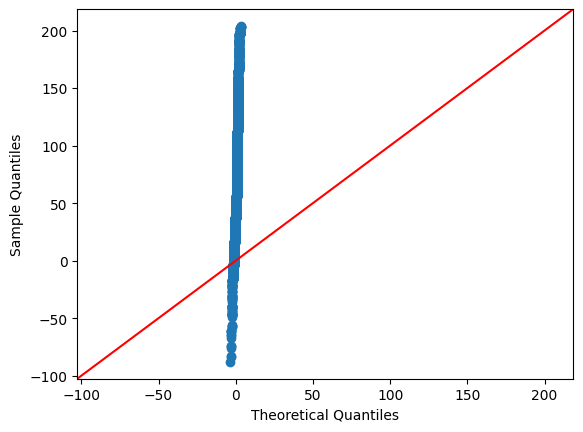

In [12]:
sm.qqplot(sales["Profit"], line ='45');

- Como observamos en el qqplot, nuestra variable no está nada ajustada a la línea roja, lo cual nos indica una distribución no normal.